<a href="https://colab.research.google.com/github/alorenz465446/NYC_Parking_Tickets/blob/main/NYC_Neuro_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
from google.colab import files
uploaded = files.upload()
import io


Saving dropped_na_nyc_color_fix.csv to dropped_na_nyc_color_fix (3).csv


In [2]:
#  Import and read the csv.
import pandas as pd 

# Set DataFrame
nyc_df = pd.read_csv(io.BytesIO(uploaded['dropped_na_nyc_color_fix.csv']))
nyc_df

,Plate_Type,Violation_Code,Vehicle_Body_Type,Vehicle_Color,Vehicle_Year,Violation_County,Violation_Time
0,PAS,21.0,SUBN,SILVER,2008,K,0950A
1,PAS,38.0,SUBN,WHITE,2014,NY,0817A
2,PAS,21.0,4DSD,BLACK,0,Q,0148A
3,PAS,21.0,4DSD,RED,0,K,0820A
4,PAS,36.0,4DSD,GREY,2011,QN,1047A
...,...,...,...,...,...,...,...
338518,PAS,21.0,SUBN,GREEN,2004,Q,1201P
338519,PAS,14.0,SUBN,BLACK,0,Q,1046A
338520,PAS,36.0,4DSD,RED,2003,QN,0200P
338521,PAS,38.0,4DSD,BLUE,2015,K,0202P


In [3]:
# Drop the non-beneficial columns.
nyc_df= nyc_df.drop(columns = ['Violation_Time'])


In [4]:
# View data types
nyc_df.dtypes

Plate_Type            object
Violation_Code       float64
Vehicle_Body_Type     object
Vehicle_Color         object
Vehicle_Year           int64
Violation_County      object
dtype: object

In [5]:
# Determine the number of unique values in each column.
nyc_df.nunique()


Plate_Type            2
Violation_Code        5
Vehicle_Body_Type     4
Vehicle_Color        10
Vehicle_Year         59
Violation_County      9
dtype: int64

In [6]:
# Look at 'Vehicle_Year' value counts for binning
Vehicle_Year_count=nyc_df['Vehicle_Year'].value_counts()
Vehicle_Year_count

0       70694
2015    37064
2016    35862
2014    22248
2013    17761
2012    14515
2008    13079
2007    13063
2011    12808
2006    12107
2005    11911
2010    11749
2004    11198
2009    10147
2017    10085
2003     9653
2002     7964
2001     5786
1999     3264
1998     2368
1997     1766
1996      942
1995      738
1994      466
1993      359
1992      227
1991      151
1989      119
1990      114
1988       70
1987       57
1986       36
1985       26
2018       23
1984       17
1983       11
1982        9
1970        7
1977        6
1971        6
1981        5
1978        4
1980        4
1973        4
2064        4
1976        3
2066        3
1974        3
2063        2
2019        2
1979        2
2065        2
2059        2
1975        2
2020        1
2052        1
2061        1
2069        1
2034        1
Name: Vehicle_Year, dtype: int64

In [7]:
# drop Vehicle_Year rows with 0's
nyc_df= nyc_df[nyc_df.Vehicle_Year != 0]  
nyc_df

,Plate_Type,Violation_Code,Vehicle_Body_Type,Vehicle_Color,Vehicle_Year,Violation_County
0,PAS,21.0,SUBN,SILVER,2008,K
1,PAS,38.0,SUBN,WHITE,2014,NY
4,PAS,36.0,4DSD,GREY,2011,QN
7,PAS,36.0,SUBN,BLUE,2011,QN
8,PAS,20.0,SUBN,BLACK,2016,NY
...,...,...,...,...,...,...
338517,PAS,14.0,4DSD,BLACK,2011,NY
338518,PAS,21.0,SUBN,GREEN,2004,Q
338520,PAS,36.0,4DSD,RED,2003,QN
338521,PAS,38.0,4DSD,BLUE,2015,K


In [8]:
# Replace all 1900's values to 1900 together
def change_year(year):
  if year <= 1999: 
    return 1900
  elif year >= 2018:
    return 2100
  else: return year;

nyc_df['Vehicle_Year']= nyc_df['Vehicle_Year'].apply(change_year)
nyc_df
  

,Plate_Type,Violation_Code,Vehicle_Body_Type,Vehicle_Color,Vehicle_Year,Violation_County
0,PAS,21.0,SUBN,SILVER,2008,K
1,PAS,38.0,SUBN,WHITE,2014,NY
4,PAS,36.0,4DSD,GREY,2011,QN
7,PAS,36.0,SUBN,BLUE,2011,QN
8,PAS,20.0,SUBN,BLACK,2016,NY
...,...,...,...,...,...,...
338517,PAS,14.0,4DSD,BLACK,2011,NY
338518,PAS,21.0,SUBN,GREEN,2004,Q
338520,PAS,36.0,4DSD,RED,2003,QN
338521,PAS,38.0,4DSD,BLUE,2015,K


In [9]:
# Check value counts
Vehicle_Year_count=nyc_df['Vehicle_Year'].value_counts()
Vehicle_Year_count


2015    37064
2016    35862
2014    22248
2013    17761
2012    14515
2008    13079
2007    13063
2011    12808
2006    12107
2005    11911
2010    11749
2004    11198
1900    10786
2009    10147
2017    10085
2003     9653
2002     7964
2001     5786
2100       43
Name: Vehicle_Year, dtype: int64

In [10]:
# drop Vehicle_Year rows with 2100's
nyc_df= nyc_df[nyc_df.Vehicle_Year != 2100]  
nyc_df

,Plate_Type,Violation_Code,Vehicle_Body_Type,Vehicle_Color,Vehicle_Year,Violation_County
0,PAS,21.0,SUBN,SILVER,2008,K
1,PAS,38.0,SUBN,WHITE,2014,NY
4,PAS,36.0,4DSD,GREY,2011,QN
7,PAS,36.0,SUBN,BLUE,2011,QN
8,PAS,20.0,SUBN,BLACK,2016,NY
...,...,...,...,...,...,...
338517,PAS,14.0,4DSD,BLACK,2011,NY
338518,PAS,21.0,SUBN,GREEN,2004,Q
338520,PAS,36.0,4DSD,RED,2003,QN
338521,PAS,38.0,4DSD,BLUE,2015,K


In [11]:
# Look at 'Plate_Type' value counts for binning
Plate_Type_count=nyc_df['Plate_Type'].value_counts()
Plate_Type_count

PAS    263206
COM      4580
Name: Plate_Type, dtype: int64

In [12]:
# Look at 'Violation_Code' value counts for binning
Violation_Code_count=nyc_df['Violation_Code'].value_counts()
Violation_Code_count

36.0    86680
21.0    73278
38.0    52844
20.0    30495
14.0    24489
Name: Violation_Code, dtype: int64

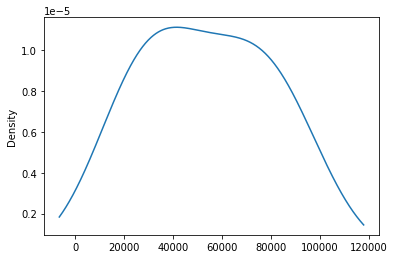

In [13]:
# Visualize the value counts of 'COLUMN'
Violation_Code_count.plot.density()

In [14]:
# Look at 'Vehicle_Body_Type' value counts for binning
Vehicle_Body_Type_count=nyc_df['Vehicle_Body_Type'].value_counts()
Vehicle_Body_Type_count

SUBN    140371
4DSD    109065
2DSD      9637
PICK      8713
Name: Vehicle_Body_Type, dtype: int64

In [15]:
# Look at 'Vehicle_Color' value counts for binning
Vehicle_Color_count=nyc_df['Vehicle_Color'].value_counts()
Vehicle_Color_count

GREY      88205
BLACK     71262
WHITE     47929
BLUE      29325
RED       17944
GREEN      8828
SILVER     3835
YELLOW      345
PURPLE       63
ORANGE       50
Name: Vehicle_Color, dtype: int64

In [16]:
# Determine which values to replace if counts are less than 10,000

replace_Vehicle_Color = list(Vehicle_Color_count[Vehicle_Color_count < 10000].index)


# Replace in dataframe
for color in replace_Vehicle_Color:
    nyc_df.Vehicle_Color = nyc_df.Vehicle_Color.replace(color,"OTHER")
    
# Check to make sure binning was successful
nyc_df.Vehicle_Color.value_counts()


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


GREY     88205
BLACK    71262
WHITE    47929
BLUE     29325
RED      17944
OTHER    13121
Name: Vehicle_Color, dtype: int64

In [17]:
# Look at 'Violation_County' value counts for binning
Violation_County_count=nyc_df['Violation_County'].value_counts()
Violation_County_count

K     64876
Q     51833
BK    37570
NY    37526
BX    35748
QN    29914
ST     6804
R      2010
MN     1505
Name: Violation_County, dtype: int64

In [18]:
# Determine which values to replace if counts are less than 10,000
replace_Violation_County = list(Violation_County_count[Violation_County_count < 10000].index)


# Replace in dataframe
for county in replace_Violation_County:
    nyc_df.Violation_County = nyc_df.Violation_County.replace(county,"ST/R/MN")
    
# Check to make sure binning was successful
nyc_df.Violation_County.value_counts()

K          64876
Q          51833
BK         37570
NY         37526
BX         35748
QN         29914
ST/R/MN    10319
Name: Violation_County, dtype: int64

In [19]:
# Look at 'COLUMN' value counts for binning
# COLUMN_count=nyc_df['COLUMN'].value_counts()
# COLUMN_count

In [20]:
# Visualize the value counts of 'COLUMN'
# COLUMN_count.plot.density()


In [21]:
# # Determine which values to replace if counts are less than ...?
# replace_COLUMN = list(COLUMN_count[COLUMN_count < 500].index)


# # Replace in dataframe
# for app in replace_COLUMN:
#     nyc_df.COLUMN = nyc_df.COLUMN.replace(app,"5M+")
    
# # Check to make sure binning was successful
# nyc_df.COLUMN.value_counts()

In [22]:
#Check Columns
# list(nyc_df.columns)

In [23]:
# Generate our categorical variable lists
cat_objects = nyc_df.dtypes[nyc_df.dtypes == "object"].index.tolist()
cat_objects



['Plate_Type', 'Vehicle_Body_Type', 'Vehicle_Color', 'Violation_County']

In [24]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(nyc_df[cat_objects]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat_objects)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Plate_Type_COM,Plate_Type_PAS,Vehicle_Body_Type_2DSD,Vehicle_Body_Type_4DSD,Vehicle_Body_Type_PICK,Vehicle_Body_Type_SUBN,Vehicle_Color_BLACK,Vehicle_Color_BLUE,Vehicle_Color_GREY,Vehicle_Color_OTHER,Vehicle_Color_RED,Vehicle_Color_WHITE,Violation_County_BK,Violation_County_BX,Violation_County_K,Violation_County_NY,Violation_County_Q,Violation_County_QN,Violation_County_ST/R/MN
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
# Merge one-hot encoded features and drop the originals
nyc_df = nyc_df.merge(encode_df,left_index=True, right_index=True)
nyc_df = nyc_df.drop(cat_objects,1)
nyc_df.head()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Violation_Code,Vehicle_Year,Plate_Type_COM,Plate_Type_PAS,Vehicle_Body_Type_2DSD,Vehicle_Body_Type_4DSD,Vehicle_Body_Type_PICK,Vehicle_Body_Type_SUBN,Vehicle_Color_BLACK,Vehicle_Color_BLUE,...,Vehicle_Color_OTHER,Vehicle_Color_RED,Vehicle_Color_WHITE,Violation_County_BK,Violation_County_BX,Violation_County_K,Violation_County_NY,Violation_County_Q,Violation_County_QN,Violation_County_ST/R/MN
0,21.0,2008,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,38.0,2014,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,36.0,2011,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,36.0,2011,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,20.0,2016,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
# Split our preprocessed data into our features and target arrays
y = nyc_df['Violation_County_NY'].values
X = nyc_df.drop(["Violation_County_NY"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 5


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="LeakyReLU"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 349
Trainable params: 349
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"


In [30]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)


In [31]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])


Streaming output truncated to the last 5000 lines.
2422/4969 [=============>................] - ETA: 17s - loss: 9.8243e-11 - accuracy: 1.0000
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
2432/4969 [=============>................] - ETA: 17s - loss: 9.8334e-11 - accuracy: 1.0000
Epoch 98: saving model to checkpoints/weights.98.hdf5
2438/4969 [=============>................] - ETA: 17s - loss: 9.8240e-11 - accuracy: 1.0000
Epoch 98: saving model to checkpoints/weights.98.hdf5
2443/4969 [=============>................] - ETA: 17s - loss: 9.8078e-11 - accuracy: 1.0000
Epoch 98: saving model to checkpoints/weights.98.hdf5
2450/4969 [=============>................] - ETA: 17s - loss: 9.7967e-11 - accuracy: 1.0000
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
2457/4969 [=============>................] - ETA: 17s - loss: 9.7882e-11 - accuracy: 1.0000
Epoch 98: saving 

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1657/1657 - 4s - loss: 2.4523e-10 - accuracy: 1.0000 - 4s/epoch - 2ms/step
Loss: 2.452316127943277e-10, Accuracy: 1.0


Export the trained model

In [33]:
# from google.colab import drive
# drive.mount('drive')

# nn.save("AlphabetSoupCharity_Optimzation.h5")
# !cp AlphabetSoupCharity_Optimzation.h5 "drive/My Drive/"
